# Laboratorio 4
Joaquín Puente

José Mérida

# 1. Preparación del Conjunto de Datos
En esta sección estaremos importando los datos CIFAR-10, normalizándolos y mostrando ejemplos de sus imágenes.

## Carga CIFAR-10
Para cargar los datos, simplemente los importamos mediantes de Keras Datasets

In [1]:
# Importar el conjunto de datos CIFAR-10
from tensorflow.keras.datasets import cifar10
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Print información
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


# Ejemplo de Datos
print("Etiqueta:", y_train[0])
print("Forma de la imagen:", X_train[0].shape)
print(f"Valores de pixeles (parcial):\n", X_train[0][0][:5])

2025-08-24 23:01:38.101332: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-24 23:01:38.101687: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-24 23:01:38.140612: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-24 23:01:39.234070: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
Etiqueta: [6]
Forma de la imagen: (32, 32, 3)
Valores de pixeles (parcial):
 [[59 62 63]
 [43 46 45]
 [50 48 43]
 [68 54 42]
 [98 73 52]]


Como podemos observar en el output, el conjunto de datos consta de 60,000 datos que son imágenes de 32x32 e utilizan 3 canales RGB con valores entre 0 y 255.

## Normalización de Datos
Para normalizar los datos, podemos simplemente dividir dentro de 255 al saber que el conjunto de datos contiene valores RGB entre 0 y 255.

In [2]:
# Normalización de Datos
X_train = X_train / 255.0
X_test = X_test / 255.0

# Ejemplo de Datos
print("Etiqueta:", y_train[0])
print("Forma de la imagen:", X_train[0].shape)
print(f"Valores de pixeles (parcial):\n", X_train[0][0][:5])

Etiqueta: [6]
Forma de la imagen: (32, 32, 3)
Valores de pixeles (parcial):
 [[0.23137255 0.24313725 0.24705882]
 [0.16862745 0.18039216 0.17647059]
 [0.19607843 0.18823529 0.16862745]
 [0.26666667 0.21176471 0.16470588]
 [0.38431373 0.28627451 0.20392157]]


Al tener los datos normalizados, tenemos las dimensiones del dataset original y ahora los 3 canales RGB contienen valores de 0-1 en vez de 0-255.

## Ejemplos de Imágenes y sus Etiquetas
Al investigar sobre el conjunto de datos, encontramos las etiquetas que se utilizan para cada una de las imágenes. Entonces podemos simplemente buscar una imagen correspondiente a cada etiqueta dentro del set de datos para mostrar ejemplos y graficarlos con Matplotlib.

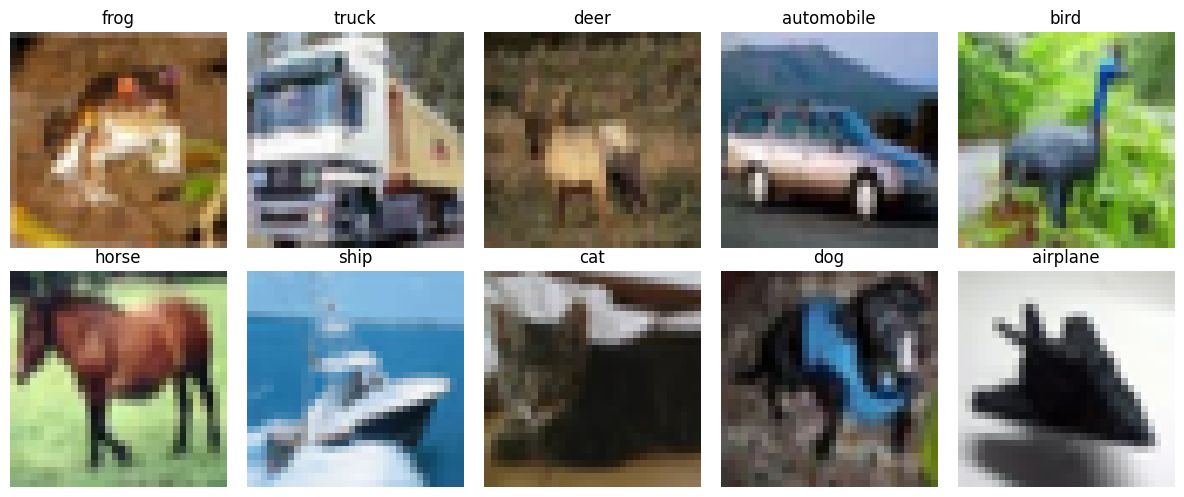

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Etiquetas de CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Búsqueda de una imagen por etiqueta
found = set()
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for i in range(len(X_train)):
    label = y_train[i][0]
    if label not in found:
        row = len(found) // 5
        col = len(found) % 5
        axes[row, col].imshow(X_train[i])
        axes[row, col].set_title(class_names[label])
        axes[row, col].axis('off')
        found.add(label)
    if len(found) == 10:
        break

plt.tight_layout()
plt.show()

Este conjunto de datos contiene imágenes de 32x32 pixeles correspondientes a los siguientes animales y objetos:

- Rana
- Camión
- Venado
- Carro
- Pájaro
- Caballo
- Barco
- Gato
- Perro
- Avión

Al ver algunos ejemplos, nos podemos dar cuenta que las imágenes tienen una variedad de colores y fondos. Por lo cual puede llegar a ser difícil clasificarlas. Además, al tener un tamaño reducido se pierden algunos de los detalles finos y algunas imágenes pueden ser difíciles de identificar como el ejemplo del venado.

# 2. Modelo Base ANN
En esta sección estaremos implementando una red neuronal totalmente conectada (ANN) de clasificación de imágenes del conjunto con la finalidad de tener un modelo de referencia.

## Creación del Modelo
La arquitectura del modelo a implementar es la siguiente
- Flatten de imagen 32x32x32 -> 3072
- Primera capa densa de 128 neuronas con activación ReLU
- Segunda capa densa de 64 neuronas con activación ReLU
- Capa de salida softmax

In [4]:
import tensorflow as tf
import time

# Creación del Modelo
model_ANN = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),  # 32x32x3 = 3072
    tf.keras.layers.Dense(128, activation='relu'),     # Primera capa escondida
    tf.keras.layers.Dense(64, activation='relu'),      # Segunda capa escondida
    tf.keras.layers.Dense(10, activation='softmax')    # Capa de salida softmax
])

/home/Japo/Documents/workspaces/uvg/dataSience/DataScience/Lab4/.venv/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-08-24 23:01:41.681132: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


## Compilación del Modelo
Para compilar el modelo estaremos utilizando Adam, el optimizador "estándar" ya que se busca un modelo simple de baseline.

In [5]:
model_ANN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenamiento del Modelo
Para el entrenamiento del modelo vamos a documentar el tiempo tomado, al igual que utilizar el 20% del conjunto de datos como datos de validación. Adicionalmente, vamos a crear diccionarios para poder mantener registro del desempeño de cada uno de los modelos y realizar un análisis comparativo en los incisos finales.

In [6]:
# Datos de tiempos de entrenamiento
training_times = {}

# Datos de historiales de entrenamiento
histories = {}

start_time = time.time()

# Entrenamiento del modelo con 20% del conjunto como validación
histories['ANN'] = model_ANN.fit(X_train, y_train, epochs=10, validation_split=0.2)

end_time = time.time()
training_time = end_time - start_time

training_times['ANN'] = training_time

print(f"\nTiempo de entrenamiento: {training_time:.2f} segundos")

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3175 - loss: 1.8916 - val_accuracy: 0.3707 - val_loss: 1.7584
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3808 - loss: 1.7239 - val_accuracy: 0.3745 - val_loss: 1.7398
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4080 - loss: 1.6567 - val_accuracy: 0.3980 - val_loss: 1.6755
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4229 - loss: 1.6092 - val_accuracy: 0.4075 - val_loss: 1.6404
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4363 - loss: 1.5725 - val_accuracy: 0.4327 - val_loss: 1.5909
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4404 - loss: 1.5527 - val_accuracy: 0.4436 - val_loss: 1.5639
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4503 - loss: 1.5295 - val_accuracy: 0.4455 - val_loss: 1.5757
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4573 - loss: 1.5117 - 

# 3. Implementación CNN
En esta sección estaremos implementando CNNs, incluyendo un modelo base al igual que experimentación con diferentes hiperparámetros.

## Modelo Baseline
Este modelo sigue la siguiente arquitectura, y funciona como modelo base para las CNNs:

- Capa Conv2D con 32 filtros, kernel 3x3 y activación ReLU
- Cada Conv2D con 64 filtros, kernel 3x3 y activación ReLU
- Capa MaxPooling2D con pool size 2x2
- Capa Flatten para transformar la imagen a vectores 1D para las capas densas
- Capa Densa de 64 neuronas con activación ReLU
- Capa de salida con softmax

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import time

# Construcción del Modelo
model_CNN = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilación del Modelo
model_CNN.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Entrenamiento del Modelo
start_time = time.time()

histories['CNN'] = model_CNN.fit(X_train, y_train,
                            epochs=10,
                            validation_split=0.2)

end_time = time.time()

training_time = end_time - start_time

training_times['CNN'] = training_time

print(f"\nTiempo de entrenamiento CNN: {training_time:.2f} segundos")

/home/Japo/Documents/workspaces/uvg/dataSience/DataScience/Lab4/.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 0.4896 - loss: 1.4213 - val_accuracy: 0.5955 - val_loss: 1.1549
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.6457 - loss: 1.0176 - val_accuracy: 0.6485 - val_loss: 1.0096
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.6961 - loss: 0.8782 - val_accuracy: 0.6621 - val_loss: 0.9768
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.7282 - loss: 0.7812 - val_accuracy: 0.6692 - val_loss: 0.9835
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.7580 - loss: 0.6943 - val_accuracy: 0.6642 - val_loss: 1.0063
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.7898 - loss: 0.6083 - val_accuracy: 0.6664 - val_loss: 1.0193
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.8157 - loss: 0.5265 - val_accuracy: 0.6666 - val_loss: 1.0703
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.8456 -

## Modelo Dropout
Para este modelo buscamos agregar Dropout entre diferentes capas para mejorar la capacidad de generalización del modelo y comparar su rendimiento con el modelo baseline.

- Capa Conv2D con 32 filtros, kernel 3x3 y activación ReLU
- Capa Dropout con tasa 0.25 para regularización
- Capa Conv2D con 64 filtros, kernel 3x3 y activación ReLU
- Capa MaxPooling2D con pool size 2x2
- Capa Dropout con tasa 0.25 para regularización
- Capa Flatten para transformar la imagen a vectores 1D para las capas densas
- Capa Densa de 64 neuronas con activación ReLU
- Capa Dropout con tasa 0.5 antes de la capa de salida para evitar sobreajuste
- Capa de salida con softmax para clasificación en 10 clases

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import time

# Construcción del Modelo con Dropout
model_CNN_Dropout = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Dropout(0.25),                       # Dropout después de la primera conv para regularización
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),                       # Dropout después del pooling para evitar sobreajuste
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),                       # Dropout fuerte antes de la capa de salida
    Dense(10, activation='softmax')
])

# Compilación del Modelo
model_CNN_Dropout.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

# Entrenamiento del Modelo
start_time = time.time()

histories['CNN_Dropout'] = model_CNN_Dropout.fit(X_train, y_train,
                                                epochs=10,
                                                validation_split=0.2)

end_time = time.time()
training_time = end_time - start_time
training_times['CNN_Dropout'] = training_time

print(f"\nTiempo de entrenamiento CNN con Dropout: {training_time:.2f} segundos")

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.3203 - loss: 1.8183 - val_accuracy: 0.4754 - val_loss: 1.5206
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.4150 - loss: 1.5774 - val_accuracy: 0.5438 - val_loss: 1.3080
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.4570 - loss: 1.4659 - val_accuracy: 0.5755 - val_loss: 1.2242
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.4821 - loss: 1.3932 - val_accuracy: 0.5934 - val_loss: 1.1671
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.5145 - loss: 1.3322 - val_accuracy: 0.6166 - val_loss: 1.0959
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.5290 - loss: 1.2776 - val_accuracy: 0.6212 - val_loss: 1.0901
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.5495 - loss: 1.2341 - val_accuracy: 0.6377 - val_loss: 1.0486
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.5593 -

## Modelo CNN_Profundo

En este modelo se aumentó la **profundidad** de la red, añadiendo más capas convolucionales y de pooling.  
La idea es que al incrementar los bloques convolucionales la red pueda capturar **características más complejas** de las imágenes, aunque a costa de mayor tiempo de entrenamiento.  
Se mantiene la activación *ReLU* y la capa de salida *softmax* para clasificación multiclase.


In [9]:
# Construcción del Modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import time

model_CNN_Profundo = Sequential([
    # Bloque 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Bloque 2
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Bloque 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilación del Modelo
model_CNN_Profundo.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# Entrenamiento del Modelo
start_time = time.time()

histories['CNN_Profundo'] = model_CNN_Profundo.fit(X_train, y_train,
                                                   epochs=10,
                                                   validation_split=0.2)

end_time = time.time()
training_time = end_time - start_time
training_times['CNN_Profundo'] = training_time

print(f"\nTiempo de entrenamiento CNN_Profundo: {training_time:.2f} segundos")


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.3866 - loss: 1.6437 - val_accuracy: 0.5045 - val_loss: 1.3554
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.5552 - loss: 1.2451 - val_accuracy: 0.5817 - val_loss: 1.1624
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.6204 - loss: 1.0709 - val_accuracy: 0.6199 - val_loss: 1.0873
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.6615 - loss: 0.9627 - val_accuracy: 0.6519 - val_loss: 0.9861
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.6932 - loss: 0.8723 - val_accuracy: 0.6711 - val_loss: 0.9350
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.7187 - loss: 0.8008 - val_accuracy: 0.6901 - val_loss: 0.9065
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.7407 - loss: 0.7373 - val_accuracy: 0.6935 - val_loss: 0.9030
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.7613 -

## Modelo CNN_BN_Dropout

Este modelo incorpora **Batch Normalization** en varias capas convolucionales para estabilizar y acelerar el entrenamiento.  
Además, se aplican capas de **Dropout moderado** después de bloques convolucionales y antes de la capa densa final, con el objetivo de reducir el sobreajuste.  
La arquitectura es más robusta frente a ruido y posibles problemas de generalización.


In [10]:
# Construcción del Modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import time

model_CNN_BN_Dropout = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compilación del Modelo
model_CNN_BN_Dropout.compile(optimizer='adam',
                             loss='sparse_categorical_crossentropy',
                             metrics=['accuracy'])

# Entrenamiento del Modelo
start_time = time.time()

histories['CNN_BN_Dropout'] = model_CNN_BN_Dropout.fit(X_train, y_train,
                                                       epochs=10,
                                                       validation_split=0.2)

end_time = time.time()
training_time = end_time - start_time
training_times['CNN_BN_Dropout'] = training_time

print(f"\nTiempo de entrenamiento CNN_BN_Dropout: {training_time:.2f} segundos")


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 61ms/step - accuracy: 0.3934 - loss: 1.7161 - val_accuracy: 0.5229 - val_loss: 1.2959
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 55ms/step - accuracy: 0.5390 - loss: 1.3142 - val_accuracy: 0.6199 - val_loss: 1.1019
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 73s 58ms/step - accuracy: 0.5995 - loss: 1.1557 - val_accuracy: 0.6513 - val_loss: 0.9815
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 72s 58ms/step - accuracy: 0.6341 - loss: 1.0567 - val_accuracy: 0.6818 - val_loss: 0.9331
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 64ms/step - accuracy: 0.6594 - loss: 0.9848 - val_accuracy: 0.7039 - val_loss: 0.8657
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 52ms/step - accuracy: 0.6854 - loss: 0.9167 - val_accuracy: 0.7107 - val_loss: 0.8462
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 55ms/step - accuracy: 0.7030 - loss: 0.8688 - val_accuracy: 0.7425 - val_loss: 0.7598
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 62ms/step - accuracy: 0.7139 -

## Modelo CNN_Ancha

En este modelo se incrementa el número de **filtros por capa** (64 y 128) y se añade una **capa densa amplia de 512 neuronas**.  
La intención es que la red tenga mayor **capacidad de representación** y pueda aprender patrones más complejos.  
Se añade también *Dropout* progresivo para controlar el sobreajuste.


In [11]:
# Construcción del Modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import time

model_CNN_Ancha = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compilación del Modelo
model_CNN_Ancha.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Entrenamiento del Modelo
start_time = time.time()

histories['CNN_Ancha'] = model_CNN_Ancha.fit(X_train, y_train,
                                             epochs=10,
                                             validation_split=0.2)

end_time = time.time()
training_time = end_time - start_time
training_times['CNN_Ancha'] = training_time

print(f"\nTiempo de entrenamiento CNN_Ancha: {training_time:.2f} segundos")


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 87s 69ms/step - accuracy: 0.4101 - loss: 1.6006 - val_accuracy: 0.5402 - val_loss: 1.2706
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 99s 79ms/step - accuracy: 0.5754 - loss: 1.1905 - val_accuracy: 0.6235 - val_loss: 1.0670
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 114s 91ms/step - accuracy: 0.6478 - loss: 1.0044 - val_accuracy: 0.6919 - val_loss: 0.8564
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 104s 83ms/step - accuracy: 0.6872 - loss: 0.8911 - val_accuracy: 0.7178 - val_loss: 0.8082
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 98s 79ms/step - accuracy: 0.7099 - loss: 0.8214 - val_accuracy: 0.7415 - val_loss: 0.7413
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 93s 74ms/step - accuracy: 0.7314 - loss: 0.7624 - val_accuracy: 0.7442 - val_loss: 0.7267
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 99s 79ms/step - accuracy: 0.7469 - loss: 0.7163 - val_accuracy: 0.7444 - val_loss: 0.7387
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 99s 79ms/step - accuracy: 0.7591

# 4. Evaluación y Comparación

## Gráficas de Exactitud y Pérdida

En esta sección se grafican las curvas de **exactitud** y **pérdida** de entrenamiento y validación para cada uno de los modelos guardados en `histories`.  
Estas gráficas permiten comparar convergencia, tendencia al sobreajuste y estabilidad del entrenamiento.

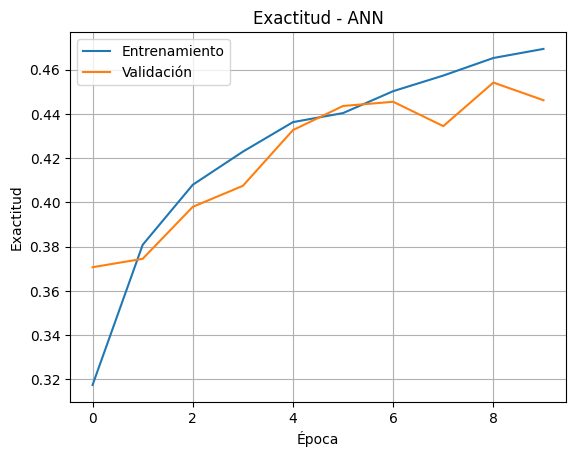

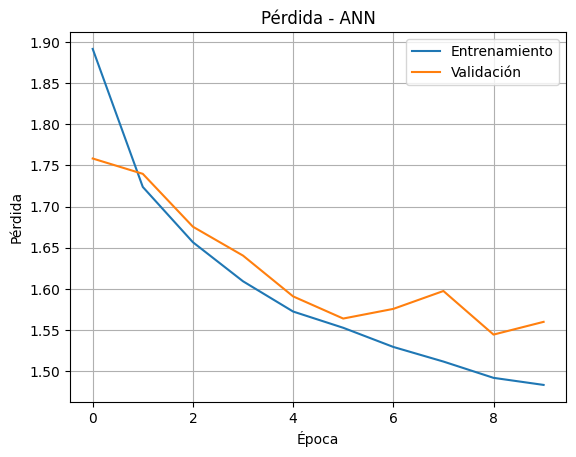

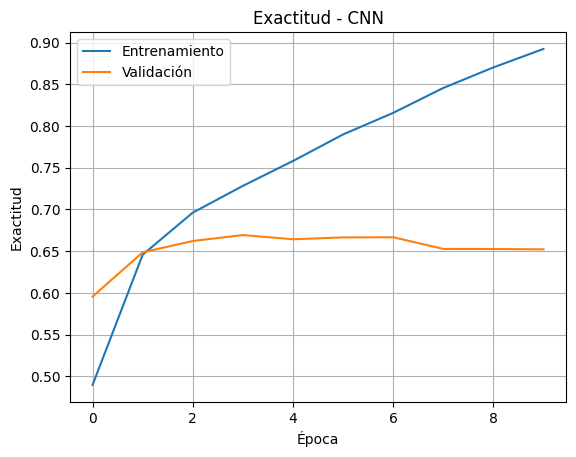

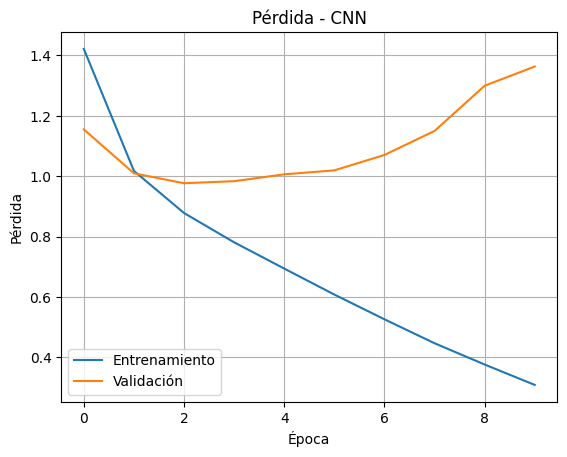

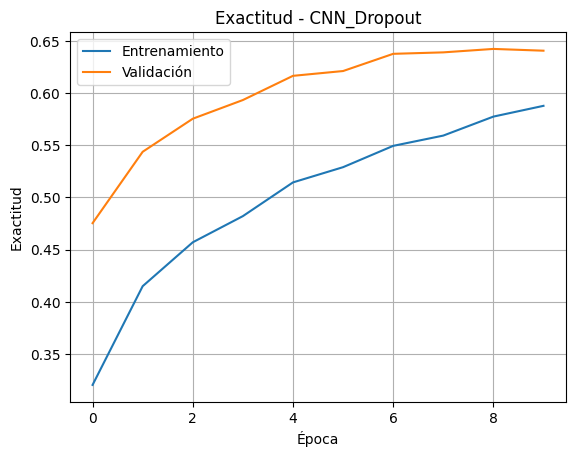

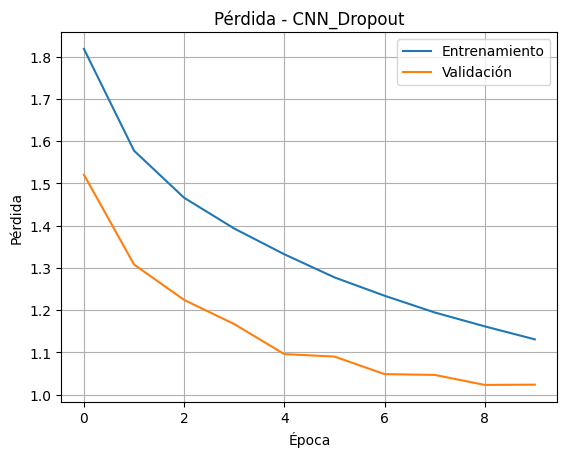

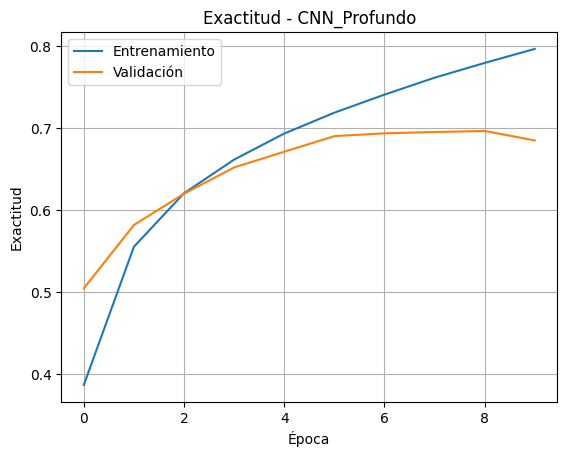

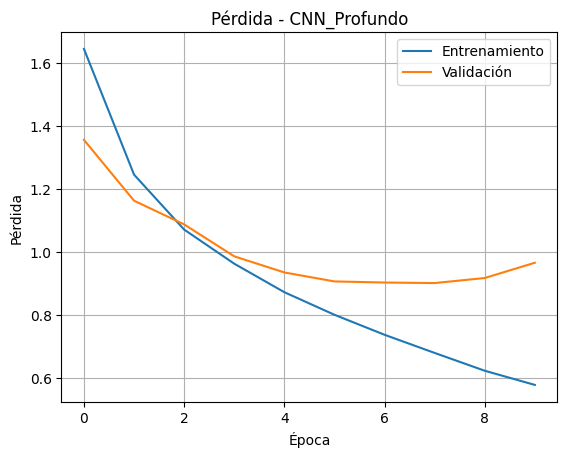

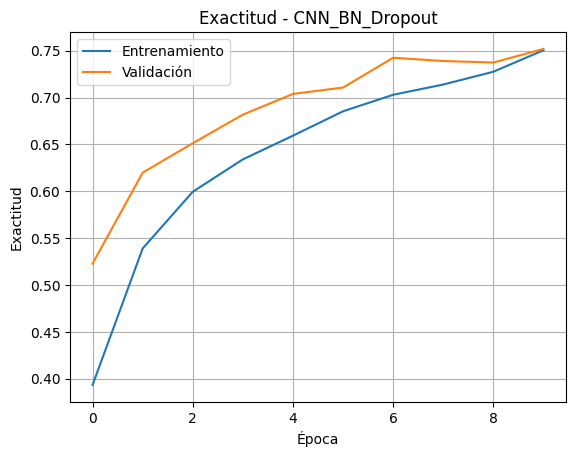

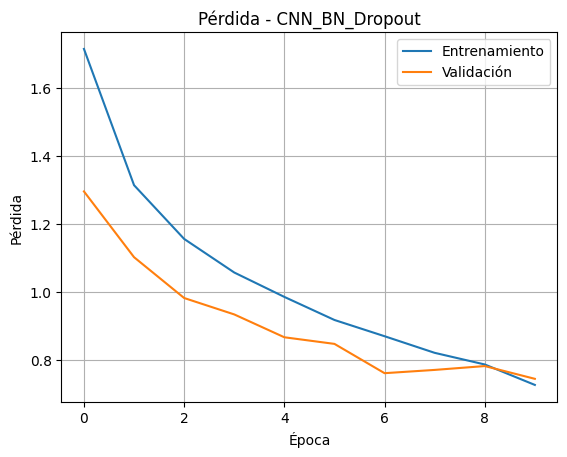

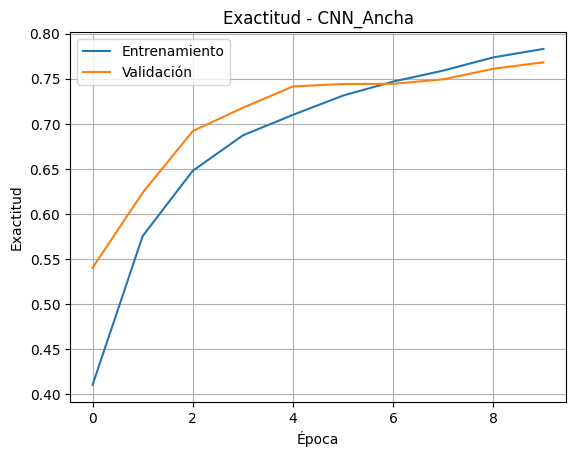

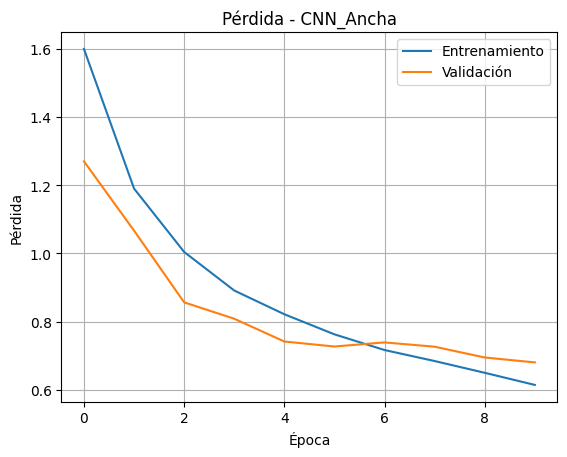

In [12]:
# Gráficas de historial (exactitud y pérdida) para cada modelo en 'histories'
import matplotlib.pyplot as plt

# Orden sugerido para presentación; solo se grafican los que existan
orden_presentacion = [
    'ANN',
    'CNN',
    'CNN_Dropout',
    'CNN_Profundo',
    'CNN_BN_Dropout',
    'CNN_Ancha'
]
# Añadimos cualquier otro que no esté en la lista anterior
orden_presentacion += [k for k in histories.keys() if k not in orden_presentacion]

for nombre in orden_presentacion:
    if nombre not in histories:
        continue
    h = histories[nombre].history

    # === Exactitud ===
    plt.figure()
    if 'accuracy' in h:
        plt.plot(h['accuracy'], label='Entrenamiento')
    if 'val_accuracy' in h:
        plt.plot(h['val_accuracy'], label='Validación')
    plt.title(f'Exactitud - {nombre}')
    plt.xlabel('Época')
    plt.ylabel('Exactitud')
    plt.legend()
    plt.grid(True)
    plt.show()

    # === Pérdida ===
    plt.figure()
    if 'loss' in h:
        plt.plot(h['loss'], label='Entrenamiento')
    if 'val_loss' in h:
        plt.plot(h['val_loss'], label='Validación')
    plt.title(f'Pérdida - {nombre}')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)
    plt.show()


### Comparación global de los seis modelos

Tras evaluar los seis modelos entrenados sobre CIFAR-10, se observan las siguientes tendencias:

- **ANN**: logra alrededor de **45% de exactitud de validación**, lo cual es bajo. Esto confirma que las redes densas sin convoluciones no son adecuadas para datos de imágenes, pues no capturan la estructura espacial.

- **CNN básica**: mejora de manera significativa, alcanzando ~65% en validación. Sin embargo, presenta sobreajuste: la exactitud de entrenamiento sube hasta casi 90% mientras que la validación se estanca, acompañado de un aumento en la pérdida de validación.

- **CNN con Dropout**: introduce regularización efectiva, reduciendo el sobreajuste. La exactitud de validación se mantiene más estable (≈64%) aunque ligeramente inferior a la CNN profunda, evidenciando que el dropout mejora la generalización pero también limita un poco la capacidad de aprendizaje.

- **CNN Profunda**: al aumentar el número de capas, el modelo aprende características más complejas, llegando a ~70% de exactitud de validación. Se aprecia un mejor balance entre aprendizaje y generalización.

- **CNN con Batch Normalization y Dropout**: combina dos técnicas clave (normalización y regularización), logrando ~75% de exactitud en validación y curvas de pérdida más estables. Este modelo generaliza mejor y muestra menos riesgo de sobreajuste.

- **CNN Ancha**: es el modelo con mejor desempeño global, alcanzando ~77% de exactitud de validación. Las curvas de entrenamiento y validación se mantienen cercanas y la pérdida disminuye de manera consistente, reflejando un aprendizaje robusto y generalización superior.

**Conclusión general**:  
La comparación evidencia claramente que:
1. Las **CNN superan de forma contundente al modelo ANN** en clasificación de imágenes.  
2. La **regularización (Dropout) y la normalización (BatchNorm)** son esenciales para mejorar estabilidad y desempeño.  
3. **Aumentar la complejidad del modelo** (profundidad y anchura) permite alcanzar mejores métricas, siempre que se acompañe de técnicas que eviten el sobreajuste.  

En conjunto, el **CNN Ancha** resulta ser el más efectivo en este estudio, validando que una mayor capacidad representacional junto con una correcta regularización es la mejor estrategia para abordar el dataset CIFAR-10.


## Evaluaciones en el Conjunto de Prueba

En esta sección se evalúan todos los modelos entrenados con el conjunto de **prueba** (`X_test`, `y_test`).  
Se muestran los valores de **pérdida** y **exactitud** para cada modelo, lo que permite comparar el desempeño general.

In [15]:
# Evaluación de los modelos en el conjunto de prueba
modelos = {}
for var_name in [
    'model_ANN',
    'model_CNN',
    'model_CNN_Dropout',
    'model_CNN_Profundo',
    'model_CNN_BN_Dropout',
    'model_CNN_Ancha'
]:
    if var_name in globals():
        modelos[var_name] = globals()[var_name]

resultados_test = {}

for nombre, modelo in modelos.items():
    print(f"\n===== Evaluación: {nombre} =====")
    loss, acc = modelo.evaluate(X_test, y_test, verbose=0)
    print(f"Test loss: {loss:.4f} | Test acc: {acc:.4f}")
    resultados_test[nombre] = {'loss': float(loss), 'accuracy': float(acc)}

# Resumen comparativo
print("\nResumen de desempeño (ordenado por exactitud):")
for k, v in sorted(resultados_test.items(), key=lambda kv: kv[1]['accuracy'], reverse=True):
    print(f"{k:25s} acc={v['accuracy']:.4f}  loss={v['loss']:.4f}")



===== Evaluación: model_ANN =====
Test loss: 1.5427 | Test acc: 0.4435

===== Evaluación: model_CNN =====
Test loss: 1.3856 | Test acc: 0.6435

===== Evaluación: model_CNN_Dropout =====
Test loss: 1.0283 | Test acc: 0.6436

===== Evaluación: model_CNN_Profundo =====
Test loss: 1.0078 | Test acc: 0.6737

===== Evaluación: model_CNN_BN_Dropout =====
Test loss: 0.7711 | Test acc: 0.7448

===== Evaluación: model_CNN_Ancha =====
Test loss: 0.7058 | Test acc: 0.7620

Resumen de desempeño (ordenado por exactitud):
model_CNN_Ancha           acc=0.7620  loss=0.7058
model_CNN_BN_Dropout      acc=0.7448  loss=0.7711
model_CNN_Profundo        acc=0.6737  loss=1.0078
model_CNN_Dropout         acc=0.6436  loss=1.0283
model_CNN                 acc=0.6435  loss=1.3856
model_ANN                 acc=0.4435  loss=1.5427


## Matrices de Confusión y Predicciones Erróneas

En esta sección se muestran las **matrices de confusión** de cada modelo evaluado en el conjunto de prueba.  
Estas matrices permiten visualizar la distribución de aciertos y errores por clase, lo que facilita analizar en qué categorías los modelos presentan mayores dificultades.


===== Matriz de Confusión: model_ANN =====


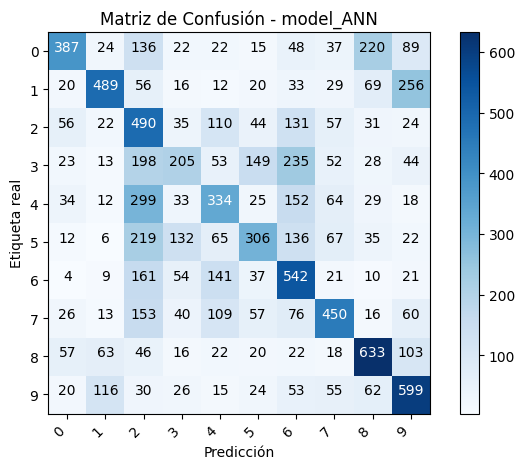


===== Matriz de Confusión: model_CNN =====


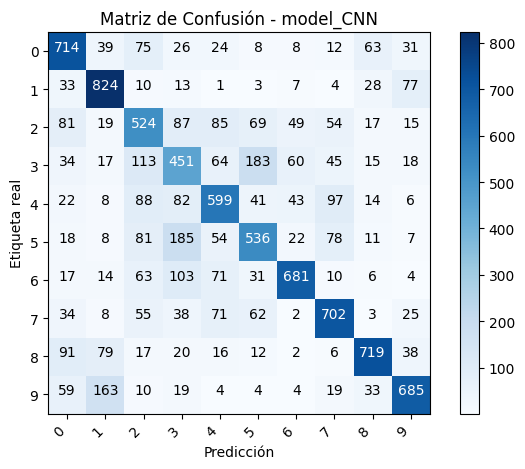


===== Matriz de Confusión: model_CNN_Dropout =====


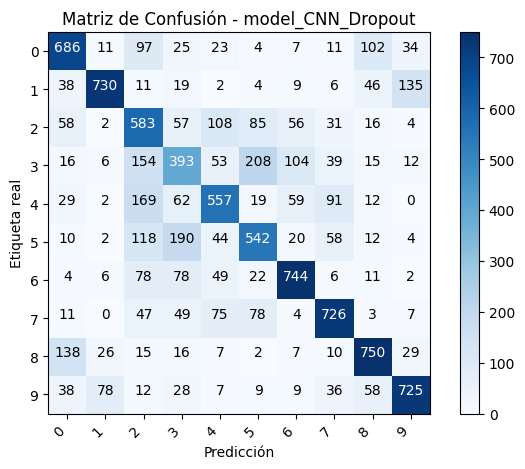


===== Matriz de Confusión: model_CNN_Profundo =====


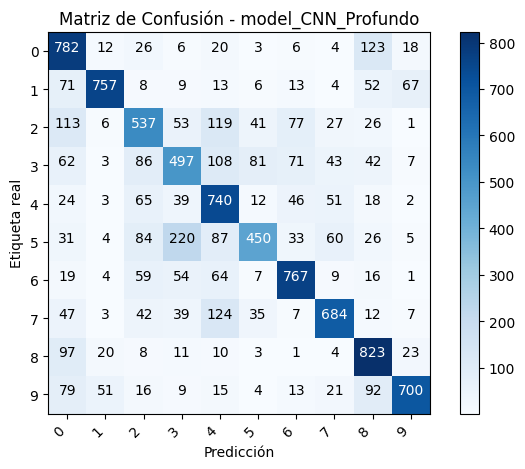


===== Matriz de Confusión: model_CNN_BN_Dropout =====


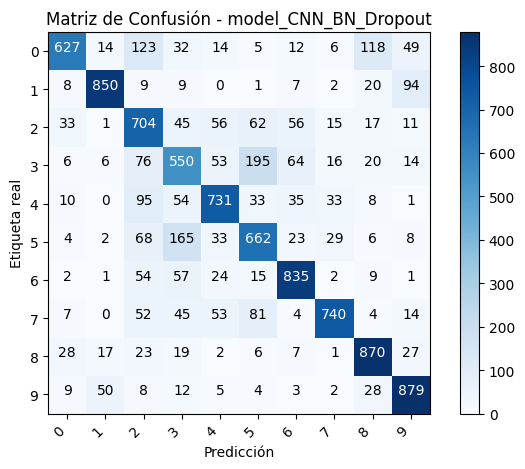


===== Matriz de Confusión: model_CNN_Ancha =====


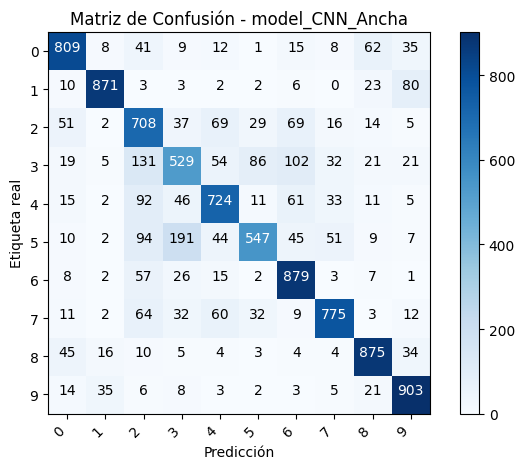

In [18]:
# Generación y graficado de matrices de confusión para todos los modelos
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, class_names, title="Matriz de Confusión"):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(title)
    plt.colorbar()
    ticks = np.arange(len(class_names))
    plt.xticks(ticks, class_names, rotation=45, ha='right')
    plt.yticks(ticks, class_names)

    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha='center',
                     color='white' if cm[i, j] > thresh else 'black')

    plt.ylabel('Etiqueta real')
    plt.xlabel('Predicción')
    plt.tight_layout()
    plt.show()

# Etiquetas de prueba
clases = np.unique(y_test)
clases_txt = [str(c) for c in clases]

for nombre, modelo in modelos.items():
    print(f"\n===== Matriz de Confusión: {nombre} =====")
    preds = modelo.predict(X_test, verbose=0)
    if preds.ndim == 2 and preds.shape[1] > 1:
        y_pred = np.argmax(preds, axis=1)
    else:
        y_pred = (preds.ravel() > 0.5).astype(int)

    cm = confusion_matrix(y_test, y_pred, labels=clases)
    plot_confusion_matrix(cm, class_names=clases_txt, title=f"Matriz de Confusión - {nombre}")


Al analizar las matrices de confusión de los diferentes modelos, se observa una clara **mejoría progresiva** conforme se incrementa la complejidad de las arquitecturas CNN:

- El **modelo ANN** muestra un desempeño bajo, con una gran dispersión de predicciones equivocadas entre varias clases. Esto es esperable ya que no aprovecha la estructura espacial de las imágenes.
- El **modelo CNN básico** ya concentra más aciertos en la diagonal principal, aunque aún presenta confusiones notables entre clases visualmente similares (por ejemplo, **automóvil vs. camión** o **gato vs. perro**).
- El **modelo CNN con Dropout** y el **CNN Profundo** logran una mejor discriminación, reduciendo algunos errores, aunque todavía con cierta confusión en clases de animales.
- El **CNN con Batch Normalization y Dropout** mejora de forma significativa la distribución, mostrando una diagonal mucho más definida y menos dispersión, lo que indica mayor capacidad de generalización.
- Finalmente, el **CNN Ancha** es el que obtiene los mejores resultados: la mayoría de los ejemplos caen correctamente en la diagonal principal, con confusiones residuales mucho más reducidas.

En conjunto, se confirma que:
1. **El uso de convoluciones** es esencial para imágenes (mejora inmediata respecto al ANN).  
2. **La regularización (Dropout) y la normalización por lotes (BatchNorm)** ayudan a reducir el sobreajuste y estabilizar el aprendizaje.  
3. **El aumento de filtros y neuronas densas** (modelo Ancho) brinda mayor capacidad de representación, alcanzando el mejor rendimiento.  

En resumen, la complejidad extra en las arquitecturas CNN aporta mejoras claras en la clasificación de CIFAR-10, validando el rol fundamental del diseño de la red en el desempeño final.

### Ejemplos erroneos

En este apartado se muestran **imágenes mal clasificadas** por cada modelo.  
De cada modelo se seleccionan algunos ejemplos de predicciones incorrectas junto con su etiqueta real y la predicha, para observar los casos más problemáticos.


===== Ejemplos de errores: model_ANN =====


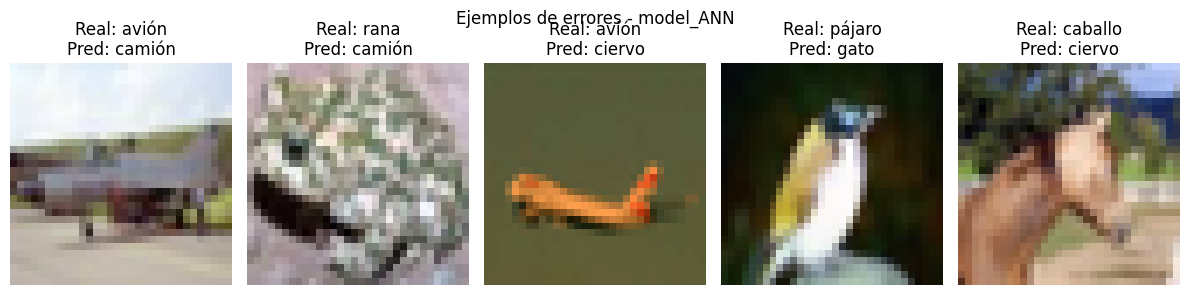


===== Ejemplos de errores: model_CNN =====


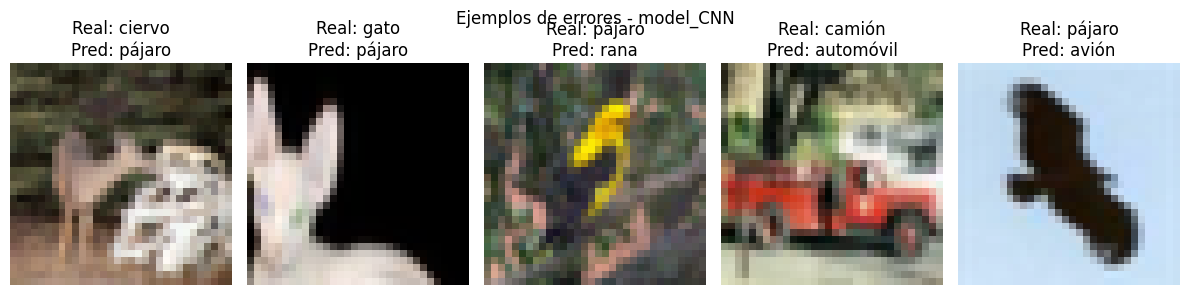


===== Ejemplos de errores: model_CNN_Dropout =====


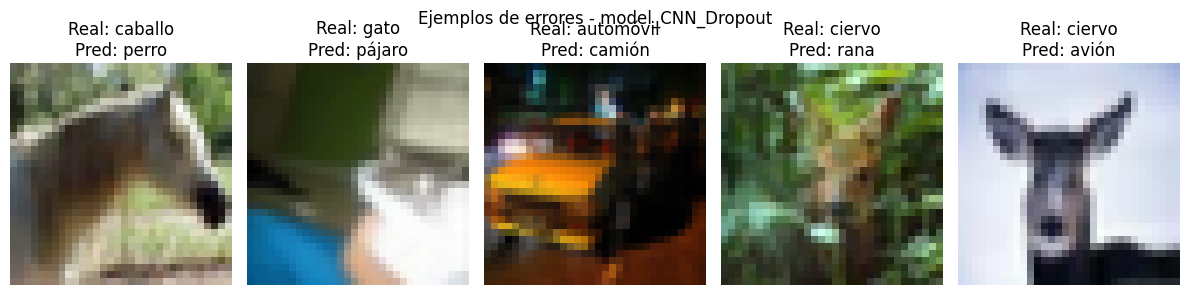


===== Ejemplos de errores: model_CNN_Profundo =====


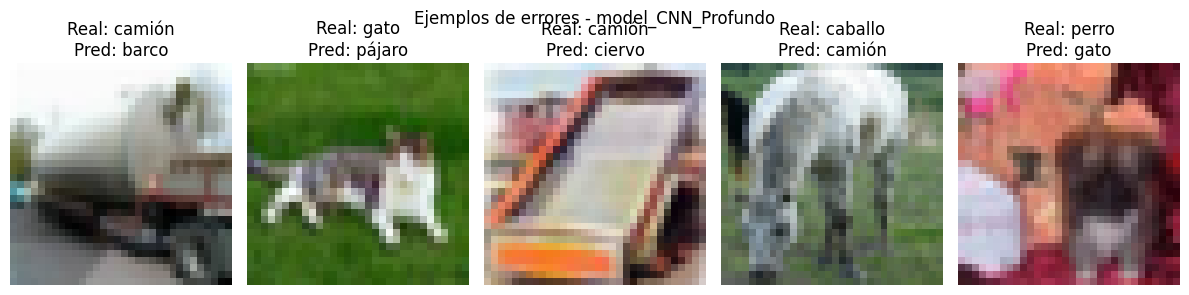


===== Ejemplos de errores: model_CNN_BN_Dropout =====


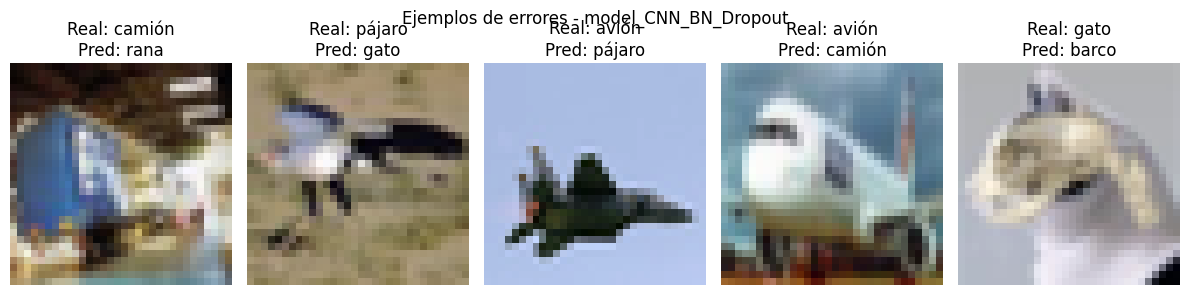


===== Ejemplos de errores: model_CNN_Ancha =====


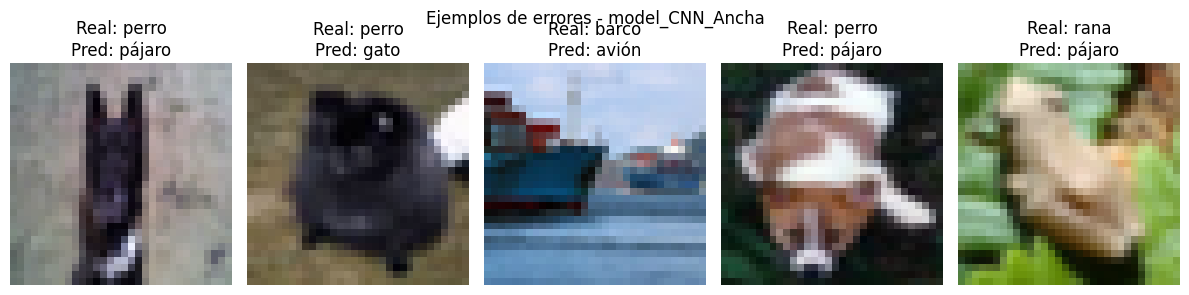

In [21]:
# Visualización de ejemplos de predicciones erróneas en CIFAR-10
import numpy as np
import matplotlib.pyplot as plt

# Mapeo de etiquetas CIFAR-10
cifar10_labels = [
    "avión", "automóvil", "pájaro", "gato", "ciervo",
    "perro", "rana", "caballo", "barco", "camión"
]

def prepare_for_display(x):
    """Asegura que la imagen esté en formato (H,W,C) y [0,1] para mostrarla."""
    x = np.asarray(x)
    if x.dtype != np.uint8:
        x_min, x_max = float(x.min()), float(x.max())
        if x_max - x_min > 1e-8:
            x = (x - x_min) / (x_max - x_min)
        else:
            x = np.zeros_like(x)
    return x

for nombre, modelo in modelos.items():
    print(f"\n===== Ejemplos de errores: {nombre} =====")
    preds = modelo.predict(X_test, verbose=0)
    if preds.ndim == 2 and preds.shape[1] > 1:
        y_pred = np.argmax(preds, axis=1)
    else:
        y_pred = (preds.ravel() > 0.5).astype(int)

    y_true = np.ravel(np.asarray(y_test)).astype(int)
    errores_idx = np.where(y_pred != y_true)[0]

    if len(errores_idx) == 0:
        print("No se encontraron errores en este modelo.")
        continue

    muestra = np.random.choice(errores_idx, size=min(5, len(errores_idx)), replace=False)
    plt.figure(figsize=(12, 3))
    for i, idx in enumerate(muestra):
        img_disp = prepare_for_display(X_test[idx])
        plt.subplot(1, len(muestra), i+1)
        plt.imshow(img_disp)
        real = cifar10_labels[y_true[idx]]
        pred = cifar10_labels[y_pred[idx]]
        plt.title(f"Real: {real}\nPred: {pred}")
        plt.axis("off")
    plt.suptitle(f"Ejemplos de errores - {nombre}")
    plt.tight_layout()
    plt.show()


# 5. Reflexión Crítica

### Reflexión

El desempeño observado a lo largo de los experimentos deja en evidencia que las **redes convolucionales (CNN)** superan de manera significativa al modelo **ANN** en el problema de clasificación de imágenes en el dataset CIFAR-10. Esto se debe principalmente a que una red neuronal densa trata cada píxel de la imagen como una característica independiente, ignorando por completo la **estructura espacial** y las **relaciones locales** que existen entre los píxeles. En cambio, las CNN están diseñadas específicamente para aprovechar esa estructura, pues las **capas de convolución** funcionan como filtros que detectan patrones locales (bordes, texturas, formas simples) y los combinan progresivamente en capas más profundas para representar objetos cada vez más complejos. De manera complementaria, las **capas de pooling** reducen la dimensionalidad, extraen las características más relevantes y confieren invariancia frente a traslaciones o pequeñas deformaciones, lo cual permite que el modelo sea más robusto. Esto explica por qué, incluso con arquitecturas relativamente sencillas, las CNN alcanzan exactitudes de validación muy superiores, mientras que el ANN apenas logra un desempeño cercano al azar extendido. A partir de estos hallazgos, es evidente que las CNN son la elección adecuada para problemas de visión por computadora, pero también se identifican limitaciones y áreas de mejora. Entre las posibles **mejoras aplicables** destacan el uso de **data augmentation**, que incrementa la variabilidad del dataset con transformaciones artificiales (rotaciones, espejados, recortes, cambios de brillo, etc.), ayudando a reducir el sobreajuste y a mejorar la capacidad de generalización. Asimismo, la implementación de **arquitecturas más profundas y especializadas** como ResNet, VGG o DenseNet podría potenciar aún más el aprendizaje jerárquico de características complejas. Del mismo modo, la incorporación sistemática de **Batch Normalization** acelera la convergencia y estabiliza el entrenamiento, mientras que estrategias como **Dropout** controlan la complejidad para evitar que el modelo memorice en exceso. En conjunto, estas técnicas no solo mejoran la precisión alcanzable, sino que contribuyen a la creación de modelos más robustos, estables y aplicables a contextos reales, donde la variabilidad de las imágenes es mucho mayor que en un dataset controlado como CIFAR-10. Por lo tanto, este análisis confirma que el éxito de las CNN frente a las ANN en visión por computadora no se limita a un simple incremento de parámetros, sino al diseño estructural de sus capas que emulan de manera eficiente la manera en que los humanos procesamos la información visual, y que al combinarse con técnicas modernas de regularización y aumento de datos, representan la ruta más prometedora para avanzar hacia sistemas de clasificación cada vez más confiables.
